### Artificial Neural Network

##### 2020710058 Applied Data Science Doo-yeonog, Lee

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing data
data = pd.read_csv('data.csv')
del data['Unnamed: 32']

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
X = data.iloc[:, 2:].values
y = data.iloc[:, 1].values

# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [6]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

ImportError: Keras requires TensorFlow 2.2 or higher. Install TensorFlow via `pip install tensorflow`

In [5]:
# Initialising the ANN
classifier = Sequential()

In [11]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(16, activation='relu', input_dim=30))
# Adding dropout to prevent overfitting
classifier.add(Dropout(0.1))

In [12]:
# Adding the second hidden layer
classifier.add(Dense(16, activation='relu'))
# Adding dropout to prevent overfitting
classifier.add(Dropout(0.1))

In [13]:
# Adding the output layer
classifier.add(Dense(1, activation='sigmoid'))

In [14]:
# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size=100, epochs=150)

Epoch 1/150
6/6 [==============================] - 0s 1ms/step - loss: 0.7009 - accuracy: 0.6621
Epoch 2/150
6/6 [==============================] - 0s 2ms/step - loss: 0.5905 - accuracy: 0.7207
Epoch 3/150
6/6 [==============================] - 0s 2ms/step - loss: 0.5036 - accuracy: 0.7949
Epoch 4/150
6/6 [==============================] - 0s 2ms/step - loss: 0.4474 - accuracy: 0.8496
Epoch 5/150
6/6 [==============================] - 0s 2ms/step - loss: 0.4043 - accuracy: 0.8789
Epoch 6/150
6/6 [==============================] - 0s 2ms/step - loss: 0.3611 - accuracy: 0.8887
Epoch 7/150
6/6 [==============================] - 0s 2ms/step - loss: 0.3172 - accuracy: 0.9121
Epoch 8/150
6/6 [==============================] - 0s 2ms/step - loss: 0.2825 - accuracy: 0.9199
Epoch 9/150
6/6 [==============================] - 0s 2ms/step - loss: 0.2484 - accuracy: 0.9395
Epoch 10/150
6/6 [==============================] - 0s 2ms/step - loss: 0.2324 - accuracy: 0.9297
Epoch 11/150
6/6 [===========

In [19]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [20]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [21]:
print("Our accuracy is {}%".format(((cm[0][0] + cm[1][1])/57)*100))

Our accuracy is 98.24561403508771%


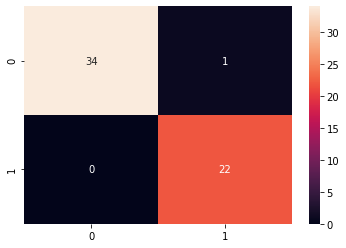

In [22]:
sns.heatmap(cm,annot=True)
#plt.savefig('h.png')